## In this part we will do Data cleaning as a part of Data Science.

In [34]:
# Let import library and read the file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('laptops.csv', encoding="latin-1")
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [11]:
# Let get information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


From the above information we can see that, all the columns are not aligned properly. Example: Column "Storage has got white space".
In the below, we have removed the white space.

In [39]:

AllColumns = []

for each in df.columns:
    AllColumns.append(each.strip())
    
AllColumns

['Manufacturer',
 'Model Name',
 'Category',
 'Screen Size',
 'Screen',
 'CPU',
 'RAM',
 'Storage',
 'GPU',
 'Operating System',
 'Operating System Version',
 'Weight',
 'Price (Euros)']

In [40]:
df.columns = AllColumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1303 non-null   object
 2   Category                  1303 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7   Storage                   1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 132.5+ KB


But there is still parentheses, which we want to get read of it and let get all column name to lowercase.

In [41]:
column = df.columns


def collcorrect(column):
    newcol = []
    for col in column:
        col = col.strip()
        col = col.replace("Operating System", "os")
        col = col.replace(" ","_")
        col = col.replace("(", "")
        col = col.replace(")", "")
        col = col.replace('"', "")
        col = col.lower()
        newcol.append(col)
    return newcol

result = collcorrect(column)
df.columns = result

In [42]:
df.columns


Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight',
       'price_euros'],
      dtype='object')

## Converting String Columns to Numeric

We observed earlier that all 13 columns have the object dtype, meaning they're stored as strings. Let's look at the first few rows of some of our columns:

In [16]:
df.iloc[0:5, 2:5]

,category,screen_size,screen
0,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600
1,Ultrabook,"13.3""",1440x900
2,Notebook,"15.6""",Full HD 1920x1080
3,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800
4,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600


- category: Purely text data - there are no numeric values.
- screen_size: Numeric data stored as text data because of the " character.
- screen: A combination of pure text data with numeric data.

In [17]:
# lets find what the data types and unique values in given column

def find_pattern(col):
    pattern = {}
    for each in col:
        result = df[each].unique()
        pattern[each] = result
    return pattern
find_pattern(df[['screen_size','ram','weight']])


{'screen_size': array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
        '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
        '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object),
 'ram': array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
       dtype=object),
 'weight': array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
        '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
        '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
        '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
        '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
        '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
        '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
        '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
        '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
        '2.9kg', '2.56kg',

In [18]:
# Let's get rid of GB from df['ram'] and assign the new values.
df['screen_size'] = df['screen_size'].str.replace('"', '')
df['ram'] = df['ram'].str.replace('GB', '')
df['weight'] = df['weight'].str.replace('kg','')

find_pattern(df[['screen_size','ram','weight']])


{'screen_size': array(['13.3', '15.6', '15.4', '14.0', '12.0', '11.6', '17.3', '10.1',
        '13.5', '12.5', '13.0', '18.4', '13.9', '12.3', '17.0', '15.0',
        '14.1', '11.3'], dtype=object),
 'ram': array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object),
 'weight': array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
        '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
        '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
        '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
        '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
        '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
        '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
        '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
        '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
        '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', 

In [19]:
df['weight'] = df['weight'].str.replace('4s','3.0')

In [20]:
# Now lets change the data type of screen size,ram and weight.
df[['screen_size','ram','weight']] = df[['screen_size','ram','weight']].apply(pd.to_numeric)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1303 non-null   object 
 1   model_name    1303 non-null   object 
 2   category      1303 non-null   object 
 3   screen_size   1303 non-null   float64
 4   screen        1303 non-null   object 
 5   cpu           1303 non-null   object 
 6   ram           1303 non-null   int64  
 7   storage       1303 non-null   object 
 8   gpu           1303 non-null   object 
 9   os            1303 non-null   object 
 10  os_version    1133 non-null   object 
 11  weight        1303 non-null   float64
 12  price_euros   1303 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Replacing column name for screen and ram

In [22]:
# Here axis means, column.
df.rename({'screen_size' : 'screen_size_inches'}, axis=1, inplace=True)
df.rename({'ram' : 'ram_gb'}, axis=1, inplace=True)

In [23]:
df.head(3)


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,"898,94"
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,"575,00"


## Finding CPU and GPU manufracture company

In [24]:
df['cpu_manufracture'] = df['cpu'].str.split().str[0]
df['gpu_manufracture'] = df['gpu'].str.split().str[0]

In [25]:
df[['cpu_manufracture','gpu_manufracture']]

,cpu_manufracture,gpu_manufracture
0,Intel,Intel
1,Intel,Intel
2,Intel,Intel
3,Intel,AMD
4,Intel,Intel
...,...,...
1298,Intel,Intel
1299,Intel,Intel
1300,Intel,Intel
1301,Intel,AMD


## Find out who is the top manufracturer for cpu and gpu.

In [26]:
# Top cpu manufracture.

df['cpu_manufracture'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_manufracture, dtype: int64

In [27]:
# Top gpu manufracture.

df['gpu_manufracture'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_manufracture, dtype: int64

Intel is in the top manufracturer for cpu and gpu. 

## Correcting values in "os" column.
There are values with in incorrect format we need to fix it.

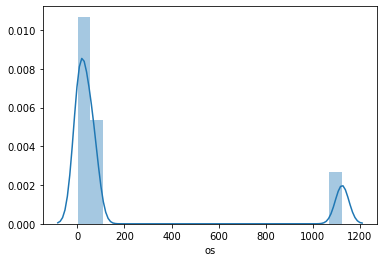

In [47]:
# macOS and Mac OS refere to same operating systerm.
operating = df['os'].value_counts()

sns.distplot(os)

In [279]:
# Don't run commented code below twice, as it will throw NaN if dict key doesn't match in column.

mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}

#df['os'] = df['os'].map(mapping_dict)
df['os']

0         macOS
1         macOS
2         No OS
3         macOS
4         macOS
         ...   
1298    Windows
1299    Windows
1300    Windows
1301    Windows
1302    Windows
Name: os, Length: 1303, dtype: object

In [4]:
df['os'].value_counts()

KeyError: 'os'

## Let find how many null values are there in each column

In [281]:
df.isnull().sum()

manufacturer            0
model_name              0
category                0
screen_size_inches      0
screen                  0
cpu                     0
ram_gb                  0
storage                 0
gpu                     0
os                      0
os_version            170
weight                  0
price_euros             0
cpu_manufracture        0
gpu_manufracture        0
dtype: int64

we can see that there are only 170 null values in os_version column.

In [282]:
df['os_version'].value_counts(dropna=False)

10      1072
NaN      170
7         45
10 S       8
X          8
Name: os_version, dtype: int64

In [283]:
# Filling null values with appropirate values.

df.loc[df['os_version'].isnull(),'os'].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

In [284]:
df.loc[df['os'] == 'macOS', 'os_version'] = 'X'
df.loc[df['os'] == "No OS", "os_version"] = "Version Unknown"

## Top/Bottom Laptop Manufacturer Company

In [285]:
# Top 5 manufacturer company

top_brand = df['manufacturer'].value_counts(normalize=True)
top_brand.head()

Dell      0.227936
Lenovo    0.227936
HP        0.210284
Asus      0.121259
Acer      0.079048
Name: manufacturer, dtype: float64

In [286]:
top_brand.tail()

LG         0.002302
Chuwi      0.002302
Google     0.002302
Fujitsu    0.002302
Huawei     0.001535
Name: manufacturer, dtype: float64

From above observation, Dell, Lenovo, HP, Asus and Acer on the top list where as LG, Chuwi, Google, Fujitsu, Huawei are on the bottom.

## Top Model from top 5 Company 

In [313]:
top5_topModel = {}
for each in top_brand.index[0:5]:
    result = df.loc[df['manufacturer'] == each, 'model_name'].value_counts().head()
    top5_topModel[each] = result.index

In [314]:
pd.DataFrame(top5_topModel, index=np.arange(1,6))

,Dell,Lenovo,HP,Asus,Acer
1,XPS 13,Legion Y520-15IKBN,250 G6,Rog Strix,Aspire 3
2,Inspiron 3567,ThinkPad X1,ProBook 450,ZenBook Flip,Aspire 5
3,Vostro 3568,IdeaPad 320-15ISK,EliteBook 840,VivoBook S15,Aspire E5-576G
4,Inspiron 5570,IdeaPad Y700-15ISK,EliteBook 850,VivoBook Max,Swift 3
5,Alienware 17,IdeaPad 320-15IKBN,EliteBook 820,ROG Strix,Aspire 7


In [375]:
# Top model counts
        